In [30]:
# make sure run the Demo file in src directory

# generating ricker wavelet and reflectiviy series

In [3]:
import numpy as np
from matplotlib import pyplot as plt
#import scienceplots
from scipy.io import savemat,loadmat
import os

In [4]:
from ricker_wavelet import *

In [5]:
#defining parameters
frequency = 25
dt = 0.004
length = 0.1 
w,t = ricker_wavelet(frequency, dt, length)
directory = '..\data'
filename = os.path.join(directory, 'ricker.mat')
savemat(filename, {'w': w})

In [6]:
from random_reflectivity import *

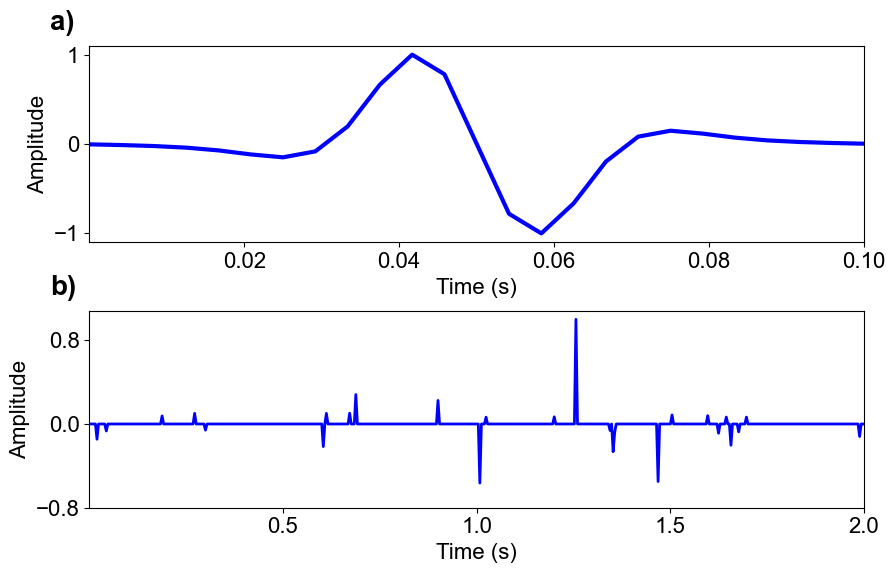

In [8]:
time,r =random_reflectivity (20*len(w),0.004)
directory = '..\data'
filename = os.path.join(directory, 'reflectivity.mat')
savemat(filename, {'r': r})
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.labelsize'] = 16
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# Create wavelet and the reflectivity series

fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"],
        ["B", "B"],
    ],
    figsize = (10, 6)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)

ax["A"].plot(t, w/max(w), color="blue", linewidth=3)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_xlim((0, 0.1))
ax["A"].set_xticks(np.arange(0.02, 0.101, step=0.02))

ax["B"].plot(time, r/max(r), color="blue", linewidth=2)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yticks(np.arange(-.8, 1.01, step=.8))
ax["B"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["B"].set_xlim((0, 2))
plt.show()
fig.savefig('..\data/riker_reflectivity.png', dpi=600, bbox_inches='tight')

# synthetic data with and without noise 

In [9]:
from gen_data import *
d,dnew=generate_data(w,r,4)
dtime=np.arange(0, 0.004 * len(d), 0.004)
directory = '../data'
filename = os.path.join(directory, 'data.mat')
savemat(filename, {'d': d})
filename = os.path.join(directory, 'data_noise.mat')
savemat(filename, {'dnew': dnew})

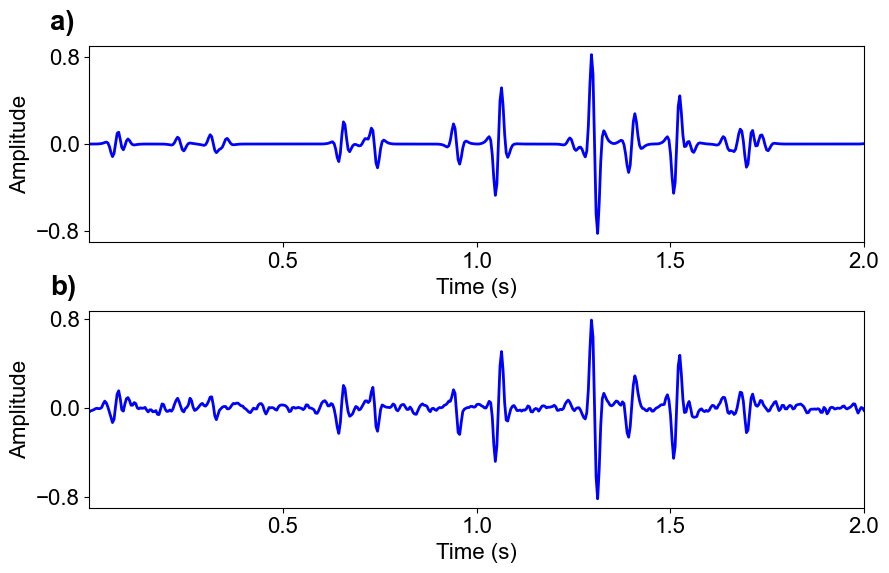

In [10]:
fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"],
        ["B", "B"],
    ],
    figsize = (10, 6)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)

ax["A"].plot(dtime, d, color="blue", linewidth=2)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["A"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["A"].set_xlim((0, 2))

ax["B"].plot(dtime, dnew, color="blue", linewidth=2)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["B"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["B"].set_xlim((0, 2))
plt.show()
fig.savefig('../data/data.png', dpi=600, bbox_inches='tight')


# Build Toeplitz matrix from the wavelet for inversion purposes

In [11]:
from toep import *
p=len(d)
q=len(w)
x0=np.hstack((np.zeros(p-q+1))) #initial guess for solution
#run the function with the true wavelet
A=toep(w,p)

In [12]:
from steepest_des_reg import *
from conj_grad_reg import *

# Quality control and filtering

In [13]:
from band_pass import *
from Q_factor import *

# Noise free results with steepest descent and CG without regularization

10.39630519611488
58.25727039360557


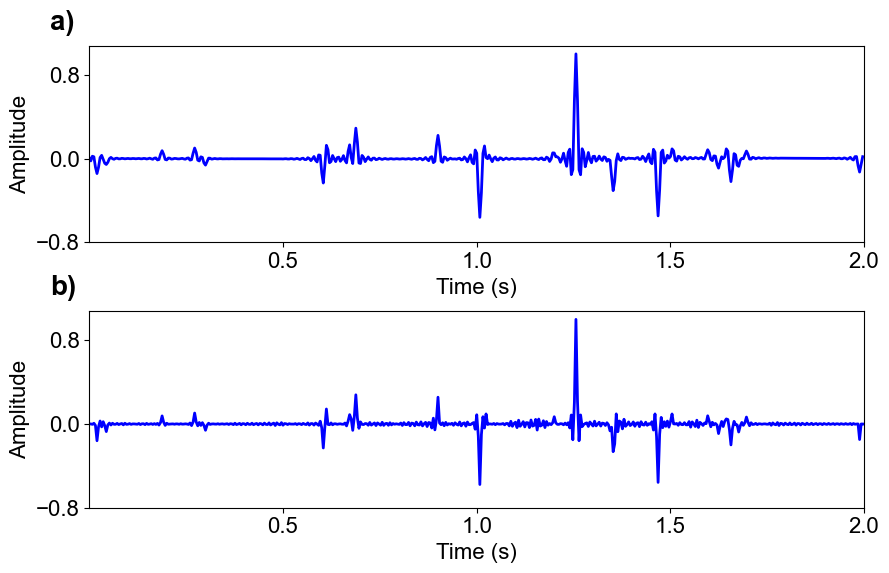

In [14]:
#x_sol_sd,final_iter_sd=steepest_descent_reg(A,d,x0,0.1, 0.0,10000)

x_sol_sd,final_iter_sd=steepest_des_reg(A,d,x0, 0.0,10000)

x_sol_cg, final_iter_cg=conj_grad_reg(A, d,x0,0,10000,tol=0.000001)
f1=1
f2=2
f3=75
f4=85
r_f=bp_filter_1D(r, dt, f1, f2, f3, f4)
x_sol_sd_f=bp_filter_1D(x_sol_sd, dt, f1, f2, f3, f4)
x_sol_cg_f=bp_filter_1D(x_sol_cg, dt, f1, f2, f3, f4)
Q_sd=quality_factor(x_sol_sd_f/max(np.abs(x_sol_sd_f)),r_f/max(np.abs(r_f)))
Q_cg=quality_factor(x_sol_cg_f/max(np.abs(x_sol_cg_f)),r_f/max(np.abs(r_f)))
                                 
print(Q_sd)
print(Q_cg)                                 
fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"],
        ["B", "B"],
    ],
    figsize = (10, 6)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)

ax["A"].plot(time, x_sol_sd/max(np.abs(x_sol_sd)), color="blue", linewidth=2)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["A"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["A"].set_xlim((0, 2))

ax["B"].plot(time, x_sol_cg/max(np.abs(x_sol_cg)), color="blue", linewidth=2)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["B"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["B"].set_xlim((0, 2))
plt.show()
fig.savefig('../results/free_data/conj&steep.png', dpi=600, bbox_inches='tight')


# Noisy data results with steepest descent and CG without regularization

-5.402722910364293
-10.585716342509917


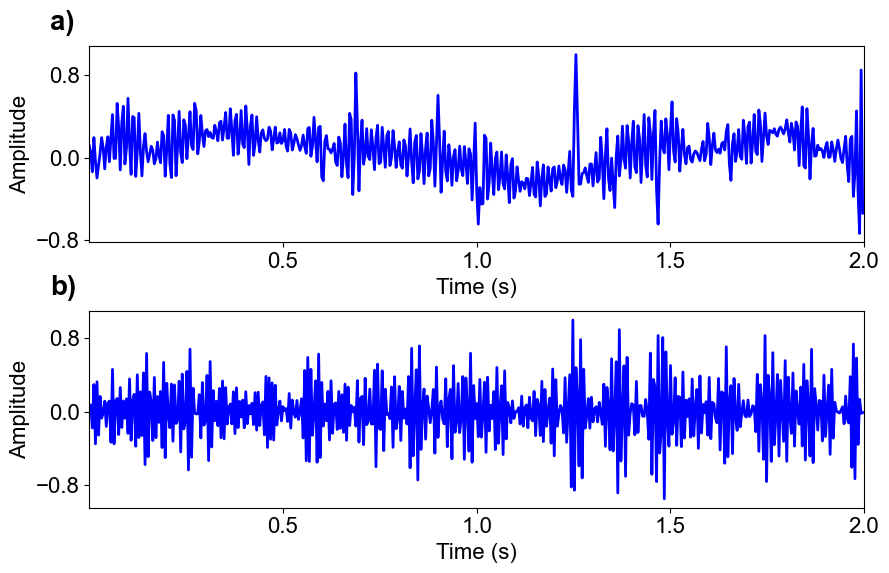

In [13]:
#x_sol_sd,final_iter_sd=steepest_descent_reg(A,dnew,xo,0.1, 0.0,10000)
x_sol_sd,final_iter_sd=steepest_des_reg(A,dnew,x0, 0.0,10000)

x_sol_cg, final_iter_cg=conj_grad_reg(A, dnew,x0,0,10000,tol=0.000001)

x_sol_sd_f=bp_filter_1D(x_sol_sd, dt, f1, f2, f3, f4)
x_sol_cg_f=bp_filter_1D(x_sol_cg, dt, f1, f2, f3, f4)
Q_sd=quality_factor(x_sol_sd_f/max(np.abs(x_sol_sd_f)),r_f/max(np.abs(r_f)))
Q_cg=quality_factor(x_sol_cg_f/max(np.abs(x_sol_cg_f)),r_f/max(np.abs(r_f)))
                                 
print(Q_sd)
print(Q_cg) 


fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"],
        ["B", "B"],
    ],
    figsize = (10, 6)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)

ax["A"].plot(time, x_sol_sd/max(np.abs(x_sol_sd)), color="blue", linewidth=2)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["A"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["A"].set_xlim((0, 2))

ax["B"].plot(time, x_sol_cg/max(np.abs(x_sol_cg)), color="blue", linewidth=2)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["B"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["B"].set_xlim((0, 2))
plt.show()
fig.savefig('../results/noisy_data/conj&steep.png', dpi=600, bbox_inches='tight')

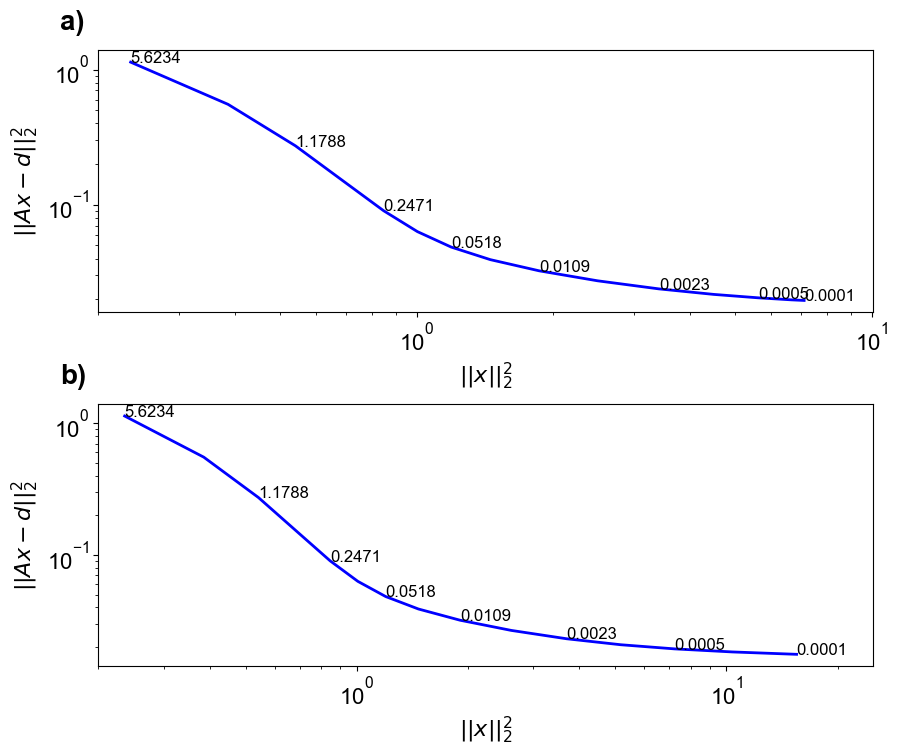

In [14]:
_lambda=np.logspace(-4,.75,15)
x_sd=[]  #empty list for solution  norm
y_sd=[]   #empty list for residual norm
x_cg=[]
y_cg=[]
for i in _lambda:
    x_sol,itr=steepest_des_reg(A,dnew,x0, i,10000)
    x_sd.append((np.linalg.norm(x_sol))**2) #calculating norm of solution 
    y_sd.append((np.linalg.norm(dnew-np.dot(A,x_sol)))**2)#calculating norm of residual  
    
    x_sol_cg_noise_reg,itr=conj_grad_reg(A, dnew, x0, i, 10000, tol=1e-6)
    x_cg.append((np.linalg.norm(x_sol_cg_noise_reg))**2) #calculating norm of solution 
    y_cg.append((np.linalg.norm(dnew-np.dot(A,x_sol_cg_noise_reg)))**2) #calculating norm of residual 
    

fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"],
        ["B", "B"],
    ],
    figsize = (10, 8)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)

ax["A"].plot(x_sd, y_sd, color="blue", linewidth=2)

x_sd_plot=x_sd[::2]
y_sd_plot=y_sd[::2]
_lambda_plot=_lambda[::2]
for i in range(len(_lambda_plot)):
    ax["A"].text(x_sd_plot[i],y_sd_plot[i],""+str(np.round(_lambda_plot[i],4)),fontsize=12)

ax["A"].set_xlabel("$||x||_2^2$")
ax["A"].set_ylabel("$||Ax-d||_2^2$")
ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
#ax["A"].set_yticks(np.arange(.2, .8, step=.2))
#ax["A"].set_xticks(np.arange(.4, 2, step=.2))
#ax["A"].set_xlim((0, 6))
ax["A"].set_yscale('log')
ax["A"].set_xscale('log')
ax["A"].set_xlim((0.2, 10.1))

ax["B"].plot(x_cg, y_cg, color="blue", linewidth=2)

x_cg_plot=x_cg[::2]
y_cg_plot=y_cg[::2]
_lambda_plot=_lambda[::2]
for i in range(len(_lambda_plot)):
    ax["B"].text(x_cg_plot[i],y_cg_plot[i],""+str(np.round(_lambda_plot[i],4)),fontsize=12)
    
ax["B"].set_xlabel("$||x||_2^2$")
ax["B"].set_ylabel("$||Ax-d||_2^2$")    
ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yscale('log')
ax["B"].set_xscale('log')
#ax["B"].set_yticks(np.arange(.2, .8, step=.2))
#ax["B"].set_xticks(np.arange(1, 6, step=1))
ax["B"].set_xlim((0.2, 25))
plt.show()

fig.savefig('../results/noisy_data/lcurve_conj&steep.png', dpi=600, bbox_inches='tight')    

# Noisy data results with steepest descent and CG with l2 regularization

1.721326014698732
1.725126484759071


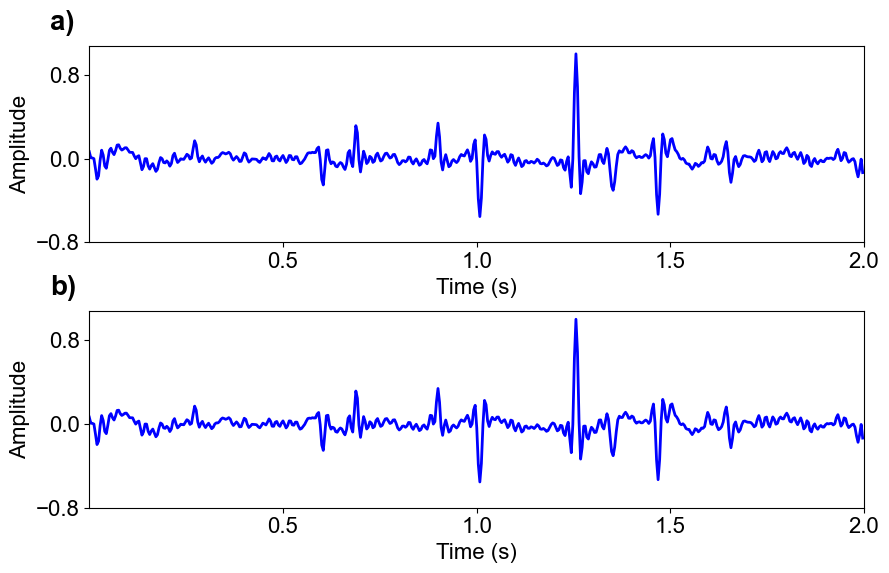

In [15]:
#x_sol_sd,final_iter_sd=steepest_descent_reg(A,dnew,x0,0.1,.5,10000)

x_sol_sd,final_iter_sd=steepest_des_reg(A,dnew,x0,.2,10000)

x_sol_cg, final_iter_cg=conj_grad_reg(A, dnew,x0,.2,10000,tol=0.000001)

x_sol_sd_f=bp_filter_1D(x_sol_sd, dt, f1, f2, f3, f4)
x_sol_cg_f=bp_filter_1D(x_sol_cg, dt, f1, f2, f3, f4)
Q_sd=quality_factor(x_sol_sd_f/max(np.abs(x_sol_sd_f)),r_f/max(np.abs(r_f)))
Q_cg=quality_factor(x_sol_cg_f/max(np.abs(x_sol_cg_f)),r_f/max(np.abs(r_f)))
                                 
print(Q_sd)
print(Q_cg) 

fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"],
        ["B", "B"],
    ],
    figsize = (10, 6)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)

ax["A"].plot(time, x_sol_sd/max(np.abs(x_sol_sd)), color="blue", linewidth=2)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["A"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["A"].set_xlim((0, 2))

ax["B"].plot(time, x_sol_cg/max(np.abs(x_sol_cg)), color="blue", linewidth=2)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["B"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["B"].set_xlim((0, 2))
plt.show()
fig.savefig('../results/noisy_data/reg_conj&steep.png', dpi=600, bbox_inches='tight')

# Noisy data results with steepest descent with sparsity regularization (Huber, Cauchy, Hybrid and Hoyer squraed). 


In [16]:
from huber import *
from cauchy import *
from hybrid import *
from hoyer import *


13.375969737941155
11.192243993218709
13.41180972272458
13.014076564177204


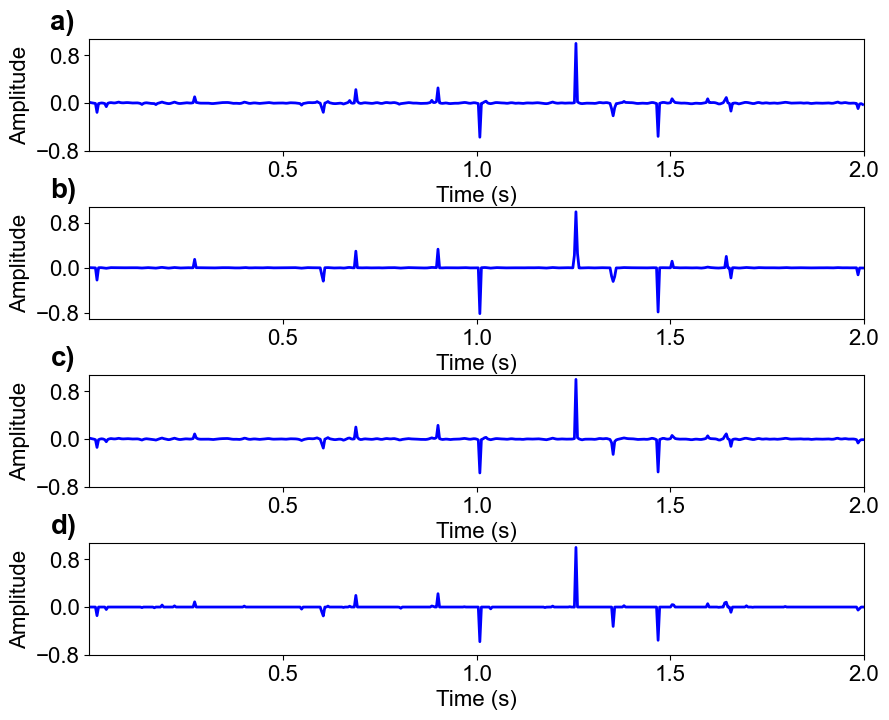

In [20]:
x_sol_huber,final_iter=steepest_descent_reg_huber(A,dnew,x0,0.005,0.08, 1e-2,10000)
x_sol_cauchy,final_iter=steepest_descent_reg_cauchy(A,dnew,x0,0.001, .002,1e-2,10000)
x_sol_hybrid,final_iter=steepest_descent_reg_hybrid(A,dnew,x0,0.005, .12,1e-2, 10000)
x_sol_hoyer, final_iter=SD_hoyer_squared(A, dnew, x0, 0.001, 0.05, max_iter=5000, tol=1e-6)


x_sol_huber_f=bp_filter_1D(x_sol_huber, dt, f1, f2, f3, f4)
x_sol_cauchy_f=bp_filter_1D(x_sol_cauchy, dt, f1, f2, f3, f4)
x_sol_hybrid_f=bp_filter_1D(x_sol_hybrid, dt, f1, f2, f3, f4)
x_sol_hoyer_f=bp_filter_1D(x_sol_hoyer, dt, f1, f2, f3, f4)


Q_huber=quality_factor(x_sol_huber_f/max(np.abs(x_sol_huber_f)),r_f/max(np.abs(r_f)))
Q_cauchy=quality_factor(x_sol_cauchy_f/max(np.abs(x_sol_cauchy_f)),r_f/max(np.abs(r_f)))
Q_hybrid=quality_factor(x_sol_hybrid_f/max(np.abs(x_sol_hybrid_f)),r_f/max(np.abs(r_f)))
Q_hoyer=quality_factor(x_sol_hoyer_f/max(np.abs(x_sol_hoyer_f)),r_f/max(np.abs(r_f)))                                 


print(Q_huber)
print(Q_cauchy) 
print(Q_hybrid) 
print(Q_hoyer)


fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"],
        ["B", "B"],
        ["C", "C"],
        ["D", "D"]
    ],
    figsize = (10, 8)
)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax["A"].plot(time, x_sol_huber/max(np.abs(x_sol_huber)), color="blue", linewidth=2)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["A"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["A"].set_xlim((0, 2))

ax["B"].plot(time, x_sol_cauchy/max(np.abs(x_sol_cauchy)), color="blue", linewidth=2)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["B"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["B"].set_xlim((0, 2))

ax["C"].plot(time, x_sol_hybrid/max(np.abs(x_sol_hybrid)), color="blue", linewidth=2)
ax["C"].set_xlabel("Time (s)")
ax["C"].set_ylabel("Amplitude")
ax["C"].text(-.05, 1.08, s="c)", transform=ax["C"].transAxes, fontsize="20", fontweight='bold')
ax["C"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["C"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["C"].set_xlim((0, 2))

ax["D"].plot(time, x_sol_hoyer/max(np.abs(x_sol_hoyer)), color="blue", linewidth=2)
ax["D"].set_xlabel("Time (s)")
ax["D"].set_ylabel("Amplitude")
ax["D"].text(-.05, 1.08, s="d)", transform=ax["D"].transAxes, fontsize="20", fontweight='bold')
ax["D"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["D"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["D"].set_xlim((0, 2))

plt.show()
fig.savefig('../results/noisy_data/huber_hybrid_cauchy.png', dpi=600, bbox_inches='tight')

# Noisy data result with sparsity constraint (IRLS)

In [18]:
from irls import  *

12.469241502920262


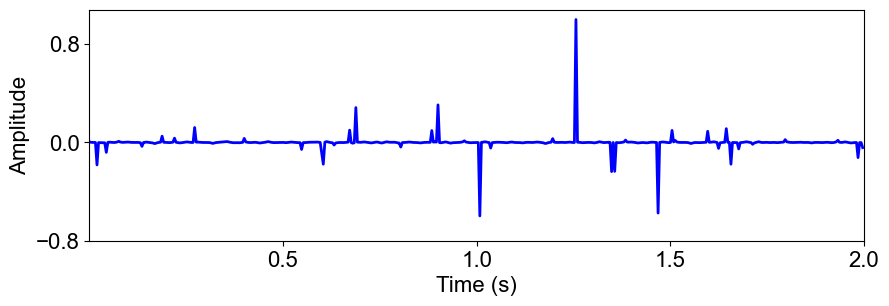

In [19]:
#x_sol_irls, final_iter_irls=irls_cg(A,d,x0,0.0002,50,200)
x_sol_noisy_irls, final_iter_noisy_irls=irls_cg(A,dnew,x0,0.002,50,200)

#x_sol_irls_f=bp_filter_1D(x_sol_irls, dt, f1, f2, f3, f4)
x_sol_noisy_irls_f=bp_filter_1D(x_sol_noisy_irls, dt, f1, f2, f3, f4)


#Q_irls=quality_factor(x_sol_irls_f/max(np.abs(x_sol_irls_f)),r_f/max(np.abs(r_f)))
Q_noisy_irls=quality_factor(x_sol_noisy_irls_f/max(np.abs(x_sol_noisy_irls_f)),r_f/max(np.abs(r_f)))

                                 
#print(Q_irls)
print(Q_noisy_irls) 


fig, ax = plt.subplot_mosaic(
    [
        ["B"],
    ],
    figsize = (10, 3)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)

ax["B"].plot(time, x_sol_noisy_irls/max(np.abs(x_sol_noisy_irls)), color="blue", linewidth=2)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
#ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["B"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["B"].set_xlim((0, 2))
plt.show()
fig.savefig('../results/noisy_data/irls.png', dpi=600, bbox_inches='tight')

# Noise data result with FISTA

In [20]:
from fista import  *
from power_method import  *

# GCV calculation for FISTA algorithm

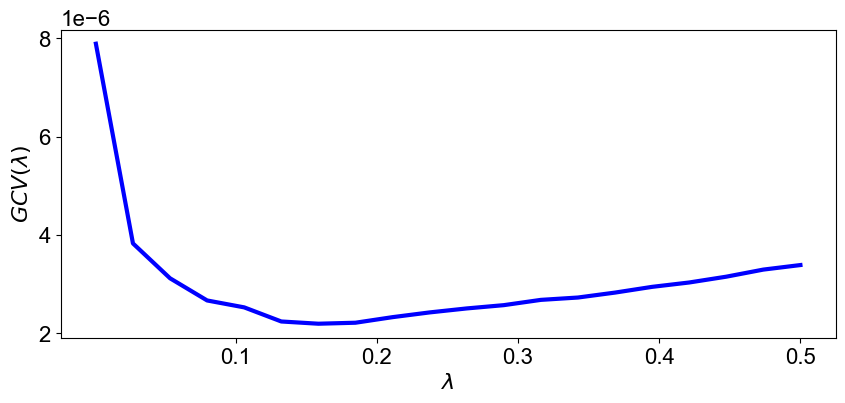

In [21]:
#_lambda=np.linspace(0,1e-2,20)
_lambda_noisy=np.linspace(1e-3,.5,20)

#y_fista=[]   #empty list for residual norm

y_fista_noisy=[]
x0=np.random.normal(0,1,r.shape)
alpha=power_method(A.T@A , x0, max_iter=15)
#c1=1.15
c2=2
N=len(x0)
#for i in _lambda:
#    x_sol_fista,J=fista(A, d, i, alpha, 10000)
#    y_fista.append((np.linalg.norm(d-np.dot(A,x_sol_fista)))**2/(N-c1*np.linalg.norm(x_sol_fista,0))**2) #calculating norm of residual 

for i in _lambda_noisy:    
    x_sol_fista_noisy,J=fista(A, dnew, i, alpha, 10000)
    y_fista_noisy.append((np.linalg.norm(dnew-np.dot(A,x_sol_fista_noisy)))**2/(N-c2*np.linalg.norm(x_sol_fista_noisy,0))**2) #calculating norm of residual 



fig, ax = plt.subplot_mosaic(
    [
        ["B"],
    ],
    figsize = (10, 4)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)


#ax["A"].plot(_lambda, y_fista, color="blue", linewidth=3)

#x_sd_plot=x_sd[::2]
#y_sd_plot=y_sd[::2]
#_lambda_plot=_lambda[::2]
#for i in range(len(_lambda_plot)):
#    ax["A"].text(x_sd_plot[i],y_sd_plot[i],""+str(np.round(_lambda_plot[i],4)),fontsize=12)

#ax["A"].set_xlabel("$\lambda$")
#ax["A"].set_ylabel("$GCV (\lambda)$")
#ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
#ax["A"].set_yticks(np.arange(.5*1e-9, 1.7*1e-9, step=.5*1e-9))
#ax["A"].set_xticks(np.arange(.002, 0.011, step=.002))
#ax["A"].set_xlim((0, 6))
#ax["A"].set_yscale('log')
#ax["A"].set_xscale('log')
#ax["A"].set_xlim((0.2, 10.1))

ax["B"].plot(_lambda_noisy, y_fista_noisy, color="blue", linewidth=3)

    
ax["B"].set_xlabel("$\lambda$")
ax["B"].set_ylabel("$GCV (\lambda)$")   
#ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
#ax["B"].set_yscale('log')
#ax["B"].set_xscale('log')
ax["B"].set_xticks(np.arange(.1, .51, step=.1))
ax["B"].set_yticks(np.arange(2*1e-6, 8.1*1e-6, step=2*1e-6))
#ax["B"].set_xlim((0.2, 25))
plt.show()

fig.savefig('../results/noisy_data/GCV.png', dpi=600, bbox_inches='tight')    
    

14.006130715776736


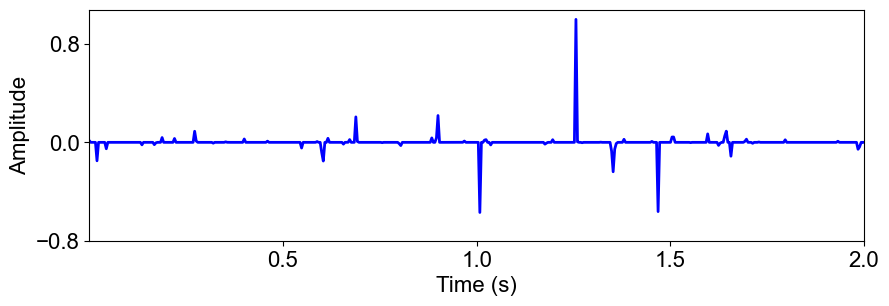

In [22]:
x0=np.random.normal(0,1,r.shape)
alpha=power_method(A.T@A , x0, max_iter=15)

#x_sol_fista,J=fista(A, d, 0.005, alpha, 10000)


x_sol_fista_noisy,J=fista(A, dnew, 0.15, alpha, 10000)


#x_sol_fista_f=bp_filter_1D(x_sol_fista, dt, f1, f2, f3, f4)
x_sol_fista_noisy_f=bp_filter_1D(x_sol_fista_noisy, dt, f1, f2, f3, f4)


#Q_fista=quality_factor(x_sol_fista_f/max(np.abs(x_sol_fista_f)),r_f/max(np.abs(r_f)))
Q_fista_noisy=quality_factor(x_sol_fista_noisy_f/max(np.abs(x_sol_fista_noisy_f)),r_f/max(np.abs(r_f)))

                                 
#print(Q_fista)
print(Q_fista_noisy) 

fig, ax = plt.subplot_mosaic(
    [
        ["B"],
    ],
    figsize = (10, 3)
)
plt.subplots_adjust(wspace=0.5, hspace=0.35)

#ax["A"].plot(time, x_sol_fista/max(np.abs(x_sol_fista)), color="blue", linewidth=2)
#ax["A"].set_xlabel("Time (s)")
#ax["A"].set_ylabel("Amplitude")
#ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
#ax["A"].set_yticks(np.arange(-.8, 1.2, step=0.8))
#ax["A"].set_xticks(np.arange(0.5, 2.2, step=0.5))
#ax["A"].set_xlim((0, 2))

ax["B"].plot(time, x_sol_fista_noisy/max(np.abs(x_sol_fista_noisy)), color="blue", linewidth=2)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
#ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["B"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["B"].set_xlim((0, 2))
plt.show()
fig.savefig('../results/noisy_data/fista.png', dpi=600, bbox_inches='tight')

# # Noisy results with Alternating minimization 

In [23]:
def Alternating_minimization(d,w0, x0, _lambda_fista, _lambda_cg,fista_maxiter,cg_maxiter, max_iter_alternating):
    
    import numpy as np
    p=len(d)
    x=x0

    
    w=w0
    for i in range(max_iter_alternating):
        x0=np.random.normal(0,1,r.shape) # random vector for 
        w_old=w
        W=toep(w,p)
        alpha=power_method(W ,x0, max_iter=15)
        x,J=fista(W, d, _lambda_fista, alpha, fista_maxiter)
        R=toep(x,p)
        w,final_iter= conj_grad_reg(R, d, w, _lambda_cg, cg_maxiter, tol=0.00001)
        if np.linalg.norm(w-w_old)<0.000001:
            print(i)
            break
        else:
            continue
    return w,x 
def lag_sign_correction(w_input,x_input, w_reference):
    
    import numpy as np
    from scipy import signal

    correlation = signal.correlate(np.abs(w_input), np.abs(w_reference), mode="full")

    lags = signal.correlation_lags(w_input.size, w_reference.size, mode="full")
    lag = lags[np.argmax(correlation)]
    w_corrected=0*w_reference
    x_corrected=0*x_input
    #print(lag)
    
    
    if lag>0:
        w_corrected[0:-lag]=w_sol[lag:]
        x_corrected[lag:]=x_input[0:-lag]
    elif lag<0:
        w_corrected[-lag:]=w_sol[0:lag]
        x_corrected[0:lag]=x_input[-lag:]
    
    a=np.linalg.norm(w_corrected/max(np.abs(w_corrected))+w_reference/max(np.abs(w_reference)))
    b=np.linalg.norm(2*w_reference/max(np.abs(w_reference)))
    
    if a<0.5*b:  
        correction_sign=-1
    else:
        correction_sign=1    
    
    #print(a)
    #print(b)
    
    w_corrected=w_corrected*correction_sign
    x_corrected=x_corrected*correction_sign
        
    return w_corrected, x_corrected

In [24]:
# create initial estimate of wavelet-zero phase ricker
w0,t=ricker_wavelet(25, dt, length,0)
q=len(w0)
p=len(d)
x0=np.hstack((np.zeros(p-q+1)))

# Apply alternatinve minimization method with fista for reflectivity inversion 
#and CG with smoothness constraint for wavelet estimation

w_sol,x_sol=Alternating_minimization(dnew, w0, x0, 0.18, 0.02, 500, 50, 500)
w_sol_alternating_corrected, x_sol_alternating_corrected=lag_sign_correction(w_sol,x_sol, w)

x_sol_alternating_corrected_f=bp_filter_1D(x_sol_alternating_corrected, dt, f1, f2, f3, f4)

Q_alternating_reflectivity=quality_factor(x_sol_alternating_corrected_f/max(np.abs(x_sol_alternating_corrected_f)),r_f/max(np.abs(r_f)))

Q_alternating_wavelet=quality_factor(w_sol_alternating_corrected/max(np.abs(w_sol_alternating_corrected)),w/max(np.abs(w)))                               
print(Q_alternating_reflectivity)
print(Q_alternating_wavelet) 

12.60122778464771
19.75933270675413


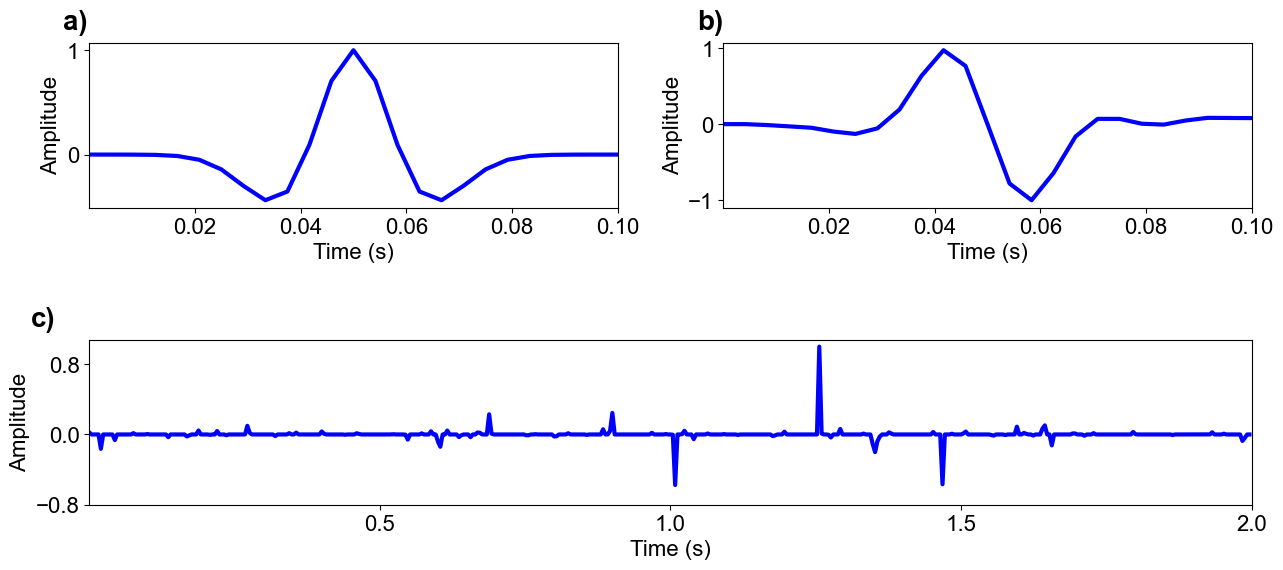

In [25]:

fig, ax = plt.subplot_mosaic(
    [
        ["A", "B"],
        ["C", "C"]
    ],
    figsize = (15, 6)
)
plt.subplots_adjust(wspace=0.2, hspace=0.8)
ax["A"].plot(t, w0/max(np.abs(w0)), color="blue", linewidth=3)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-.05, 1.08, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_xlim((0, 0.1))
ax["A"].set_xticks(np.arange(0.02, 0.101, step=0.02))

ax["B"].plot(t, w_sol_alternating_corrected/max(np.abs(w_sol_alternating_corrected)), color="blue", linewidth=3)
ax["B"].set_xlabel("Time (s)")
ax["B"].set_ylabel("Amplitude")
ax["B"].text(-.05, 1.08, s="b)", transform=ax["B"].transAxes, fontsize="20", fontweight='bold')
ax["B"].set_xlim((0, 0.1))
ax["B"].set_xticks(np.arange(0.02, 0.101, step=0.02))

ax["C"].plot(time, (x_sol_alternating_corrected)/max(x_sol_alternating_corrected), color="blue", linewidth=3)
ax["C"].set_xlabel("Time (s)")
ax["C"].set_ylabel("Amplitude")
ax["C"].text(-.05, 1.08, s="c)", transform=ax["C"].transAxes, fontsize="20", fontweight='bold')
ax["C"].set_yticks(np.arange(-.8, 1.2, step=0.8))
ax["C"].set_xticks(np.arange(0.5, 2.2, step=0.5))
ax["C"].set_xlim((0, 2))
plt.show()
fig.savefig('../results/noisy_data/alternating_minimization.png', dpi=600, bbox_inches='tight')